<a href="https://colab.research.google.com/github/Clemilton2607/IA_Predict/blob/main/ins_cardiaca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link do Dataset utilizado: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

#Importações e atualizações 

In [ ]:
!pip -q install plotly --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 70.7 MB/s eta 0:00:00


In [ ]:
!pip -q install yellowbrick

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Dataset

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Datasets/heart.csv')
dataset

#Pré - processamento


In [ ]:
# Verificação de valores inconstantes 
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
# Verificação de valores faltantes
dataset.isnull().sum() #Verificação de quantos valores NAN o dataset possui

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
# Variaveis utilizadas para previsão
x_dataset = dataset.iloc[:,0:11].values
x_dataset

In [ ]:
# Variáveis utilizadas para classificação
y_dataset = dataset.iloc[:,11].values
y_dataset

In [ ]:
# Label Encoder ( transformar string em número)
from sklearn.preprocessing import LabelEncoder
x_dataset[:,1] = LabelEncoder().fit_transform(x_dataset[:,1])
x_dataset[:,2] = LabelEncoder().fit_transform(x_dataset[:,2])
x_dataset[:,6] = LabelEncoder().fit_transform(x_dataset[:,6])
x_dataset[:,8] = LabelEncoder().fit_transform(x_dataset[:,8])
x_dataset[:,10] = LabelEncoder().fit_transform(x_dataset[:,10])
pd.DataFrame(x_dataset)

,0,1,2,3,4,5,6,7,8,9,10
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1
914,68,1,0,144,193,1,1,141,0,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,1


In [ ]:
# Codificando os numeros criados ( muito bom para os modelos que trabalham com ramificações)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
onehotencoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,2,6,8,10])], remainder='passthrough')
x_dataset = onehotencoder_census.fit_transform(x_dataset)
x_dataset.shape
pd.DataFrame(x_dataset)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,40,140,289,0,172,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,49,160,180,0,156,1.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,37,130,283,0,98,0.0
3,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,48,138,214,0,108,1.5
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,54,150,195,0,122,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,45,110,264,0,132,1.2
914,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,68,144,193,1,141,3.4
915,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,57,130,131,0,115,1.2
916,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,57,130,236,0,174,0.0


In [ ]:
# Padronização dos valores 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_dataset = scaler.fit_transform(x_dataset)
x_dataset

array([[-1.4331398 ,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       [-0.47848359, -1.93816322,  1.27505906, ..., -0.8235563 ,
         0.10566353, -0.59607813],
       [-1.75135854,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       ...,
       [ 0.37009972,  0.51595242, -0.81699495, ...,  1.21424608,
         0.29328271, -0.59607813],
       [ 0.37009972, -1.93816322,  0.22903206, ..., -0.8235563 ,
        -0.83243239, -0.59607813],
       [-1.64528563,  0.51595242,  1.27505906, ..., -0.8235563 ,
        -0.83243239,  1.05211381]])

#Teste 01 - Utilizando 70% treino x 30 Teste (utilizando One hot encoder )


## Treinamento x Teste

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_teste,y_train, y_teste = train_test_split(x_dataset, y_dataset, test_size = 0.30, random_state = 0)

In [ ]:
y_teste

In [ ]:
y_train

In [ ]:
x_train.shape, y_train.shape

((642, 11), (642,))

In [ ]:
x_teste.shape, y_teste.shape

((276, 11), (276,))

##Naives Bayes 85.5%

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive.fit(x_train, y_train)
forecast = naive.predict(x_teste)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste, forecast) # Acuracia do naives

0.8586956521739131

In [ ]:
confusion_matrix(y_teste, forecast) # Matriz de Confusão

array([[ 93,  20],
       [ 19, 144]])

In [ ]:
print(classification_report(y_teste, forecast))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       113
           1       0.88      0.88      0.88       163

    accuracy                           0.86       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.86      0.86      0.86       276



##Árvore de decisão 85.5%

In [ ]:
from sklearn.tree import DecisionTreeClassifier
arvore = DecisionTreeClassifier(criterion='entropy', random_state = 0)
arvore.fit(x_train,y_train)
forecast = arvore.predict(x_teste)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_teste, forecast)

0.8514492753623188

In [ ]:
confusion_matrix(y_teste, forecast)

array([[ 94,  19],
       [ 21, 142]])

In [ ]:
print(classification_report(y_teste, forecast))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       113
           1       0.88      0.87      0.88       163

    accuracy                           0.86       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.86      0.86      0.86       276



##Random Florest 85.1%

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_tree = RandomForestClassifier(n_estimators=45, criterion='entropy', random_state=0,)
random_tree.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=45, random_state=0)

In [ ]:
forecast = random_tree.predict(x_teste)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_teste, forecast)

0.8442028985507246

In [ ]:
confusion_matrix(y_teste, forecast)

array([[ 89,  24],
       [ 17, 146]])

In [ ]:
print(classification_report(y_teste, forecast))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       113
           1       0.86      0.90      0.88       163

    accuracy                           0.85       276
   macro avg       0.85      0.84      0.84       276
weighted avg       0.85      0.85      0.85       276



##Regressão logistica (S) 83.6%

In [ ]:
from sklearn.linear_model import LogisticRegression
logic = LogisticRegression(random_state = 0)
logic.fit(x_train,y_train)
forecast = logic.predict(x_teste)

In [ ]:
logic.intercept_ # Valor de B0

array([0.30464267])

In [ ]:
logic.coef_ # Coeficientes B1 B2 B3

array([[-0.28998726,  0.28998726,  0.51959171, -0.41537332, -0.22365663,
        -0.01690961,  0.13881959, -0.00983777, -0.12951475, -0.21048549,
         0.21048549, -0.00336955,  0.65920436, -0.66398521,  0.00121489,
         0.17085032, -0.31761935,  0.54887098, -0.2197656 ,  0.36045673]])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(y_teste, forecast)

0.8405797101449275

In [ ]:
confusion_matrix(y_teste, forecast)

array([[ 87,  26],
       [ 19, 144]])

In [ ]:
print(classification_report(y_teste, forecast))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       113
           1       0.85      0.88      0.86       163

    accuracy                           0.84       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.84      0.84      0.84       276



##KNN 83.6%


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 10)
knn.fit(x_train, y_train)
forecast = knn.predict(x_teste)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(y_teste, forecast)

0.855072463768116

In [ ]:
confusion_matrix(y_teste, forecast)

array([[ 88,  25],
       [ 20, 143]])

In [ ]:
print(classification_report(y_teste, forecast))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80       113
           1       0.85      0.88      0.86       163

    accuracy                           0.84       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.84      0.84      0.84       276



## SVM 85.5%


In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', random_state = 0,) #'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'
svm.fit(x_train, y_train)
forecast = svm.predict(x_teste)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(y_teste, forecast)

0.8586956521739131

In [ ]:
confusion_matrix(y_teste, forecast)

array([[ 89,  24],
       [ 16, 147]])

In [ ]:
print(classification_report(y_teste, forecast))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       113
           1       0.86      0.90      0.88       163

    accuracy                           0.86       276
   macro avg       0.85      0.84      0.85       276
weighted avg       0.85      0.86      0.85       276



## Rede Neural 84.0%

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
rede_neural = MLPClassifier(max_iter=3000, verbose=True,tol=0.0000010 , hidden_layer_sizes=(10,5))
rede_neural.fit(x_train,y_train)

Iteration 1, loss = 0.77155230
Iteration 2, loss = 0.75408824
Iteration 3, loss = 0.73714833
Iteration 4, loss = 0.72007934
Iteration 5, loss = 0.70339097
Iteration 6, loss = 0.68702205
Iteration 7, loss = 0.67064006
Iteration 8, loss = 0.65504726
Iteration 9, loss = 0.63992554
Iteration 10, loss = 0.62478711
Iteration 11, loss = 0.60989584
Iteration 12, loss = 0.59590278
Iteration 13, loss = 0.58242156
Iteration 14, loss = 0.56911765
Iteration 15, loss = 0.55660526
Iteration 16, loss = 0.54446461
Iteration 17, loss = 0.53330810
Iteration 18, loss = 0.52273546
Iteration 19, loss = 0.51213372
Iteration 20, loss = 0.50309545
Iteration 21, loss = 0.49388884
Iteration 22, loss = 0.48578674
Iteration 23, loss = 0.47809390
Iteration 24, loss = 0.47058182
Iteration 25, loss = 0.46361736
Iteration 26, loss = 0.45742613
Iteration 27, loss = 0.45149651
Iteration 28, loss = 0.44612852
Iteration 29, loss = 0.44108755
Iteration 30, loss = 0.43630623
Iteration 31, loss = 0.43210201
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=3000, tol=1e-06,
              verbose=True)

In [ ]:
forecast = rede_neural.predict(x_teste)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_teste,forecast)

0.8586956521739131

#Resultados Teste 01

1.   Naives Bayes 85.5%
2.   Árvore de decisão 85.5%
3. Random Florest 85.1%
4. Regressão logistica (S) 83.6%
5. KNN 83.6%
6. SVM 85.5%
7. Rede Neural 84.0%



# Teste 02 - Encontrando os melhores hiperparametros para cada modelo

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


#Como iremos utilizar a validação cruzada, temos que ter o dataset completo. Partindo do pre suposto que só temos as celulas de treinamento e teste iremos concatena-las para usar a validação cruzada
x_dataset = np.concatenate((x_train,x_teste), axis = 0) #Axis= 0 se refere as linhas 
y_dataset = np.concatenate((y_train,y_teste), axis = 0)
print(x_dataset.shape,y_dataset.shape)
print(x_dataset)

(918, 20) (918,)
[[-0.51595242  0.51595242  0.9223917  ... -0.55134134 -0.26759586
  -0.83243239]
 [-0.51595242  0.51595242 -1.08413811 ... -0.55134134  1.85450652
   0.10566353]
 [-0.51595242  0.51595242  0.9223917  ...  1.81375843 -0.42478863
   1.23137863]
 ...
 [-0.51595242  0.51595242  0.9223917  ...  1.81375843 -0.93566513
   0.4809019 ]
 [-0.51595242  0.51595242  0.9223917  ... -0.55134134  0.28257883
   1.79423618]
 [-0.51595242  0.51595242  0.9223917  ... -0.55134134  1.30433183
  -0.83243239]]


In [ ]:
y_dataset

##Arvore de decisão 85.07%

In [ ]:
parametros = {'criterion':['gini','entropy'],
              'splitter': ['best','random'],
              'min_samples_split': [2,5,10],
              'min_samples_leaf': [1,5,10]}
grid_search = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(x_dataset,y_dataset)
melhores_param = grid_search.best_params_
best_result = grid_search.best_score_
print(melhores_param)
print(best_result)

{'criterion': 'gini', 'min_samples_leaf': 5, 'min_samples_split': 5, 'splitter': 'random'}
0.8507543359467806


## Random Florest 88.02%

In [ ]:
parametros = {'criterion':['gini','entropy'],
              'n_estimators': [10,40,100,150],
              'min_samples_split': [2,5,10],
              'min_samples_leaf': [1,5,10]}
grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid=parametros)
grid_search.fit(x_dataset,y_dataset)
melhores_param = grid_search.best_params_
best_result = grid_search.best_score_
print(melhores_param)
print(best_result)

{'criterion': 'gini', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 40}
0.8812069375148491


## KNN 87.25%

In [ ]:
parametros = {'n_neighbors': [3,5,10,20],
              'p':[1,2]}
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(x_dataset,y_dataset)
melhores_param = grid_search.best_params_
best_result = grid_search.best_score_
print(melhores_param)
print(best_result)

{'n_neighbors': 20, 'p': 1}
0.8648847707293894


## Regressão Logistica 86,71%

In [ ]:
parametros = {'tol':[0.0001,0.00001,0.000001],
              'C': [1.0, 1.5, 2.0],
              'solver': ['lbfgs','sag','saga']
              }
grid_search = GridSearchCV(estimator = LogisticRegression(), param_grid=parametros)
grid_search.fit(x_dataset,y_dataset)
melhores_param = grid_search.best_params_
best_result = grid_search.best_score_
print(melhores_param)
print(best_result)

{'C': 2.0, 'solver': 'sag', 'tol': 0.0001}
0.8637740555951531


## SVM 87.04%

In [ ]:
parametros = {'tol':[0.0001,0.00001,0.000001],
              'C': [1.0,1.5,2.0],
              'kernel': ['rbf', 'linear','poly','sigmoid']}
grid_search = GridSearchCV(estimator = SVC(), param_grid=parametros)
grid_search.fit(x_dataset,y_dataset)
melhores_param = grid_search.best_params_
best_result = grid_search.best_score_
print(melhores_param)
print(best_result)

{'C': 2.0, 'kernel': 'rbf', 'tol': 0.0001}
0.8692385364694702


## Redes Neurais 86.7%

In [ ]:
parametros = {
    'activation': ['relu', 'logistic','tahn'],
    'solver': ['adam','sgd'],
    'batch_size': [10,56]}
grid_search = GridSearchCV(estimator = MLPClassifier(), param_grid=parametros)
grid_search.fit(x_dataset,y_dataset)
melhores_param = grid_search.best_params_
best_result = grid_search.best_score_
print(melhores_param)
print(best_result)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

{'activation': 'relu', 'batch_size': 56, 'solver': 'sgd'}
0.8725053456878118


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Cross Validation

In [ ]:
#Entendendo o que será feito

'''Variavel kfold'''#Iremos dividir a nossa base de dados em 10 partes (n_splits=10) e iremos fazer 30 testes(for i in range 30)
'''arvore,random florest, knn, rede neural....'''# Posteriormente iremos colocar os melhores parametros nos modelos de precisão
'''Scores'''# Validação cruzada com dataset dividido em 10 partes e com 30 testes
'''Resultado_...'''#Média dos resultados das validações cruzadas
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
# Arvore de decisão
resultados_arvore = []

for i in range(30):
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)

  arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10, min_samples_split=2, splitter='random') 
  scores = cross_val_score(arvore, x_dataset, y_dataset, cv = kfold)
  resultados_arvore.append(scores.mean())

In [ ]:
# Random Florest
resultados_random_forest = []
for i in range(30):
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)
  random_forest = RandomForestClassifier(criterion = 'gini', min_samples_leaf = 5, min_samples_split=5, n_estimators = 100) 
  scores = cross_val_score(random_forest, x_dataset, y_dataset, cv = kfold)
  resultados_random_forest.append(scores.mean())

In [ ]:
# Knn
resultados_knn = []
for i in range(30):
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)
  knn = KNeighborsClassifier(n_neighbors= 20, p = 1)
  scores = cross_val_score(knn, x_dataset, y_dataset, cv = kfold)
  resultados_knn.append(scores.mean())

In [ ]:
# Regressão logística
resultados_logistica = []
for i in range(30):
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)
  logistica = LogisticRegression(C = 1.0, solver = 'lbfgs', tol = 0.0001)
  scores = cross_val_score(logistica, x_dataset, y_dataset, cv = kfold)
  resultados_logistica.append(scores.mean())

In [ ]:
#SVM
resultados_svm = []
for i in range(30):
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)
  svm = SVC(kernel = 'rbf', C = 2.0,tol = 0.0001)
  scores = cross_val_score(svm, x_dataset, y_dataset, cv = kfold)
  resultados_svm.append(scores.mean())

In [ ]:
#Rede Neural
resultados_rede_neural = []

for i in range(30):
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)
  rede_neural = MLPClassifier(activation = 'logistic', batch_size = 10, solver = 'sgd')
  scores = cross_val_score(rede_neural, x_dataset, y_dataset, cv = kfold)
  resultados_rede_neural.append(scores.mean())


# Resultados do Tuning dos parametros + Cross validation

In [ ]:
#Transformando os resultados em dataframe
resultados = pd.DataFrame({
    'Arvore': resultados_arvore, 'Random forest':resultados_random_forest,
    'KNN': resultados_knn, 'Logistica': resultados_logistica,
    'SVM': resultados_svm, 'Rede Neural': resultados_rede_neural})
resultados

,Arvore,Random forest,KNN,Logistica,SVM,Rede Neural
0,0.838784,0.870401,0.875836,0.860595,0.857322,0.861670
1,0.837673,0.871441,0.868204,0.864895,0.864943,0.867069
2,0.839835,0.875753,0.865994,0.861646,0.860523,0.867093
3,0.846357,0.875788,0.869267,0.867069,0.864859,0.867069
4,0.847575,0.874761,0.872575,0.861634,0.864990,0.861646
5,0.843120,0.875764,0.870294,0.862697,0.870342,0.865958
6,0.835475,0.874713,0.871417,0.860595,0.858409,0.860607
7,0.845282,0.872504,0.873602,0.859424,0.864895,0.861598
8,0.855160,0.874809,0.867105,0.862769,0.870413,0.866030
9,0.845246,0.874725,0.872516,0.861682,0.862685,0.863856


In [ ]:
resultados.describe()

,Arvore,Random forest,KNN,Logistica,SVM,Rede Neural
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.841722,0.873777,0.870076,0.862192,0.865464,0.862956
std,0.006595,0.002709,0.003162,0.002193,0.004497,0.002928
min,0.830041,0.868144,0.863748,0.858337,0.857322,0.857250
25%,0.837682,0.872510,0.867424,0.860586,0.862721,0.860589
50%,0.840420,0.874695,0.870330,0.861646,0.864895,0.862219
75%,0.846103,0.875773,0.872575,0.862766,0.868227,0.866012
max,0.855160,0.878034,0.875836,0.867069,0.875824,0.867164


##Teste de Normalidade

In [ ]:
# Iremos verificar se qual o melhor modelo para esse dataset
alpha = 0.05 # confiabilidade do teste em 95%
from scipy.stats import shapiro
shapiro(resultados_arvore), shapiro(resultados_random_forest), shapiro(resultados_knn), shapiro(resultados_logistica), shapiro(resultados_svm), shapiro(resultados_rede_neural)

(ShapiroResult(statistic=0.9759265184402466, pvalue=0.7100167870521545),
 ShapiroResult(statistic=0.9518142342567444, pvalue=0.18903307616710663),
 ShapiroResult(statistic=0.9660708904266357, pvalue=0.437965989112854),
 ShapiroResult(statistic=0.8811215162277222, pvalue=0.0029917070642113686),
 ShapiroResult(statistic=0.9658401012420654, pvalue=0.43244701623916626),
 ShapiroResult(statistic=0.9266933798789978, pvalue=0.04014108330011368))

## Teste de hipotese com ANOVA e Tukey


In [ ]:
from scipy.stats import f_oneway
_,p = f_oneway(resultados_arvore,resultados_random_forest,resultados_knn,resultados_logistica,resultados_svm,resultados_rede_neural)
p

7.306778836881126e-76

In [ ]:
alpha = 0.05
if p <= alpha:
  print('Hípotese nula rejeitada. Dados são diferentes')
else:
  print('Hipotese alternativa rejeitada. Resultados são iguais')

Hípotese nula rejeitada. Dados são diferentes


In [ ]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural]),
                         'algoritmo': ['arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore', 
                          'random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest', 
                          'knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn', 
                          'logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica',
                          'svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm',
                          'rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural']}
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

,accuracy,algoritmo
0,0.838784,arvore
1,0.837673,arvore
2,0.839835,arvore
3,0.846357,arvore
4,0.847575,arvore
...,...,...
175,0.860583,rede_neural
176,0.863796,rede_neural
177,0.858385,rede_neural
178,0.862817,rede_neural


In [ ]:
from statsmodels.stats.multicomp import MultiComparison
compara = MultiComparison(resultados_df['accuracy'],resultados_df['algoritmo'])
teste_estatistico = compara.tukeyhsd()
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
       arvore           knn   0.0284  0.001  0.0254  0.0313   True
       arvore     logistica   0.0205  0.001  0.0175  0.0234   True
       arvore random_forest   0.0321  0.001  0.0291   0.035   True
       arvore   rede_neural   0.0212  0.001  0.0183  0.0242   True
       arvore           svm   0.0237  0.001  0.0208  0.0267   True
          knn     logistica  -0.0079  0.001 -0.0108 -0.0049   True
          knn random_forest   0.0037 0.0052  0.0007  0.0067   True
          knn   rede_neural  -0.0071  0.001 -0.0101 -0.0042   True
          knn           svm  -0.0046  0.001 -0.0076 -0.0017   True
    logistica random_forest   0.0116  0.001  0.0086  0.0145   True
    logistica   rede_neural   0.0008    0.9 -0.0022  0.0037  False
    logistica           svm   0.0033 0.0203  0.0003  0.0062   

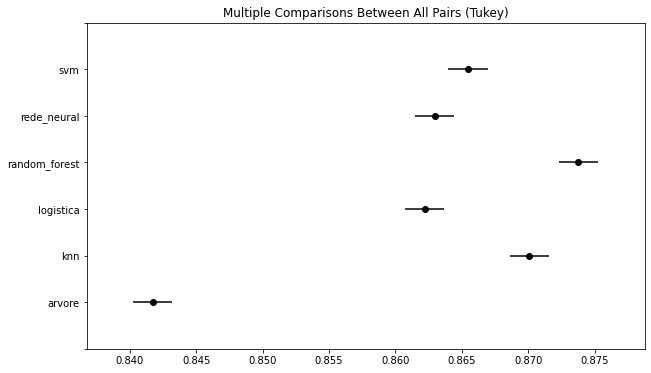

In [ ]:
teste_estatistico.plot_simultaneous(); #Random Florest é superior a todos

# Salvando e importando o modelo treinado

In [ ]:
# Modelos treinados com o tuning dos parametros
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

classificador_floresta =  RandomForestClassifier(criterion = 'gini', min_samples_leaf = 5, min_samples_split=5, n_estimators = 100) 
classificador_floresta .fit(x_dataset,y_dataset)
classificador_svm =SVC(kernel = 'rbf', C = 2.0,tol = 0.0001)
classificador_svm.fit(x_dataset,y_dataset)
classificador_knn = KNeighborsClassifier(n_neighbors= 20, p = 1)
classificador_knn.fit(x_dataset,y_dataset)

KNeighborsClassifier(n_neighbors=20, p=1)

In [ ]:
# Salvando o modelo
import pickle
pickle.dump(classificador_floresta , open('random_florest.sav', 'wb'))
pickle.dump(classificador_knn, open('knn.sav', 'wb'))
pickle.dump(classificador_svm, open('svm_finalizado.sav', 'wb'))

In [ ]:
#Lendo os arquivos dos modelos
random_florest = pickle.load(open('random_florest.sav', 'rb'))
knn = pickle.load(open('knn.sav', 'rb'))
svm = pickle.load(open('svm_finalizado.sav', 'rb'))

In [ ]:
# Escolhendo amostra aleatória como teste
novo_registro = x_dataset[1]
print(novo_registro)
novo_registro=novo_registro.reshape(1,-1)
novo_registro

[-0.51595242  0.51595242 -1.08413811 -0.48188667  1.87674385 -0.22967867
 -0.50747832  0.81427482 -0.49044933  0.8235563  -0.8235563  -0.27144836
  0.99782372 -0.86905588 -1.85743145 -1.10227193  1.29157115 -0.55134134
  1.85450652  0.10566353]


array([[-0.51595242,  0.51595242, -1.08413811, -0.48188667,  1.87674385,
        -0.22967867, -0.50747832,  0.81427482, -0.49044933,  0.8235563 ,
        -0.8235563 , -0.27144836,  0.99782372, -0.86905588, -1.85743145,
        -1.10227193,  1.29157115, -0.55134134,  1.85450652,  0.10566353]])

In [ ]:
y_dataset[1]

0

In [ ]:
resp_random = random_florest.predict(novo_registro)
resp_knn = knn.predict(novo_registro)
resp_svm = svm.predict(novo_registro)
print(resp_random[0],resp_knn[0],resp_svm[0])

0 0 0


# Combinação dos melhores modelos 

In [ ]:
morte = 0
vida= 0

if resp_random[0] == 1:
  morte += 1
else:
  vida += 1

if resp_knn[0] == 1:
  morte += 1
else:
  vida += 1

if resp_svm[0] == 1:
  morte += 1
else:
  vida += 1

if vida > morte:
  print('Normal')
elif vida == morte:
  print('Empate')
else:
  print('Insuficiencia Cardiaca')

Normal
